In [1]:
import copy

import cv2
import numpy as np
import matplotlib.pyplot as plt
# 读入图像并调整大小
img1 = cv2.imread('data/imL.png',0)
img2 = cv2.imread('data/imR.png',0)

In [2]:
#   调换颜色通道
def showImage(img):
    img = copy.deepcopy(img)
    plt.imshow(img,'gray')
    plt.show()

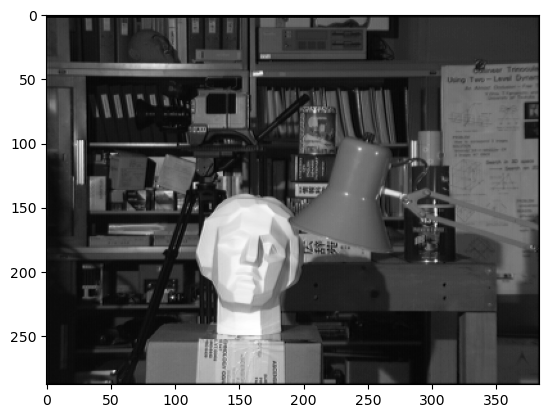

In [3]:
#   展示输入图像
showImage(img1)

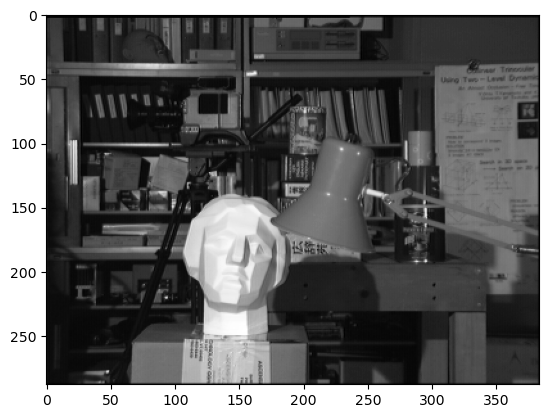

In [4]:
showImage(img2)

In [5]:
def img_aug(img):
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.equalizeHist(img)
    return img

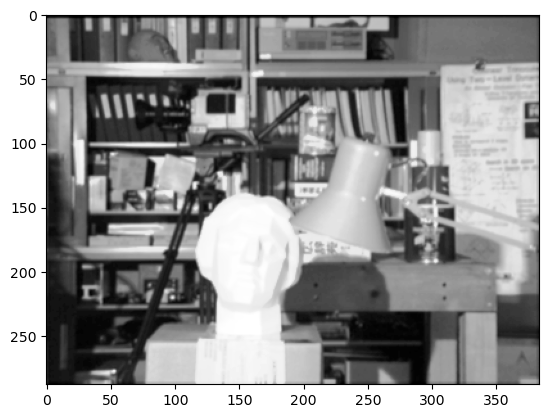

In [6]:
img1 = img_aug(img1)
showImage(img1)

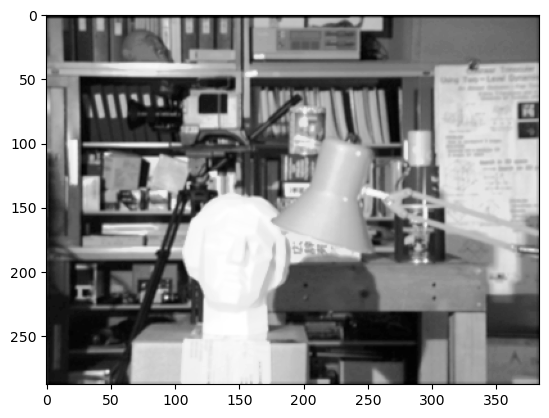

In [7]:
img2 = img_aug(img2)
showImage(img2)

In [8]:
def cal_ncc(left_block, right_block):
    # 求两个块的像素值平均值
    block_size = left_block.shape[0] * left_block.shape[1]
    left_mean = np.mean(left_block)
    right_mean = np.mean(right_block)

    # 求两个块的像素值标准差
    left_std = np.std(left_block)
    right_std = np.std(right_block)

    # 计算协方差
    covariance = np.sum((left_block - left_mean) * (right_block - right_mean))

    # 计算NCC值
    ncc = covariance / (left_std * right_std * block_size)

    return -ncc

def cal_sad(left_block, right_block):
    return np.sum(np.abs(left_block-right_block))

def cal_ssd(left_block, right_block):
    return np.sum(np.square(left_block-right_block))

In [9]:
import numpy as np

def block_match(left_img, right_img, block_size, max_disp,cost_fun ):
    # 获取图像尺寸和通道数
    height, width = left_img.shape

    # 初始化视差图
    disp_map = np.zeros((height, width))

    # 设置搜索范围
    search_range = range(max_disp)

    # 遍历左图像中的每个块
    for y in range(0, height - block_size + 1):
        for x in range(0, width - block_size + 1):
            # 获取左图像中的当前块
            left_block = left_img[y:y+block_size, x:x+block_size]

            # 初始化最小SAD值和最优视差值
            min_cost = np.inf
            best_disp = x

            # 遍历右图像中的每个可能的视差块
            for d in search_range:
                if x-d<0:
                    break
                right_block = right_img[y:y+block_size,x-d:x-d+block_size]

                # 计算当前视差块和左图像中的当前块之间的SAD值
                cost = cost_fun(left_block,right_block)

                # 更新最小SAD值和最优视差值
                if cost < min_cost:
                    min_cost = cost
                    best_disp = d

            # 将最优视差值存储到视差图中
            disp_map[y:y + block_size, x:x + block_size] = best_disp * (255 / max_disp)

    return disp_map

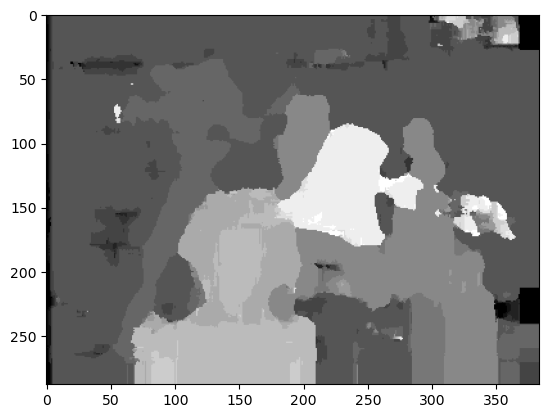

In [10]:
# 代价函数为ssd
disp_fig = block_match(img1,img2,15,16,cost_fun=cal_ssd)
showImage(disp_fig)

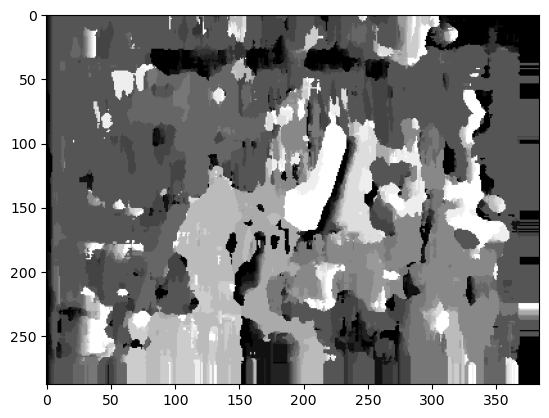

In [11]:
# 代价函数为sad
disp_fig = block_match(img1,img2,3,16,cost_fun=cal_sad)
showImage(disp_fig)

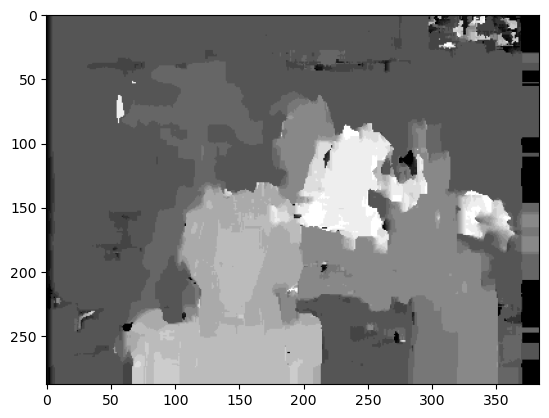

In [12]:
# 代价函数为ncc
disp_fig = block_match(img1,img2,13,16,cost_fun=cal_ncc)
showImage(disp_fig)